# Week 3 - Project 2

### Team 5

#### Goal:
1. Identify a large 2-node network.  Your data should consist of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method (ex. island method)
3. What can you infer about each of the distinct groups?


### 1. Importing our 2-node network
The Facebook-like Forum Network was attained from the Tore Opsahl website: https://toreopsahl.com/datasets/#online_forum_network. The data represents an two-mode network among 899 users and 522 topics, where the connections are weighted on the ties based on the number of messages or characters that a user posted to a topic.

In [1]:
import networkx as net
import csv
import pandas as pd
import requests
import io
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import math
%matplotlib inline

request = requests.get("https://raw.githubusercontent.com/Galanopoulog/DATA620-Project-2/master/p2_data.csv").content
data = pd.read_csv(io.StringIO(request.decode('utf-8')))
    
    

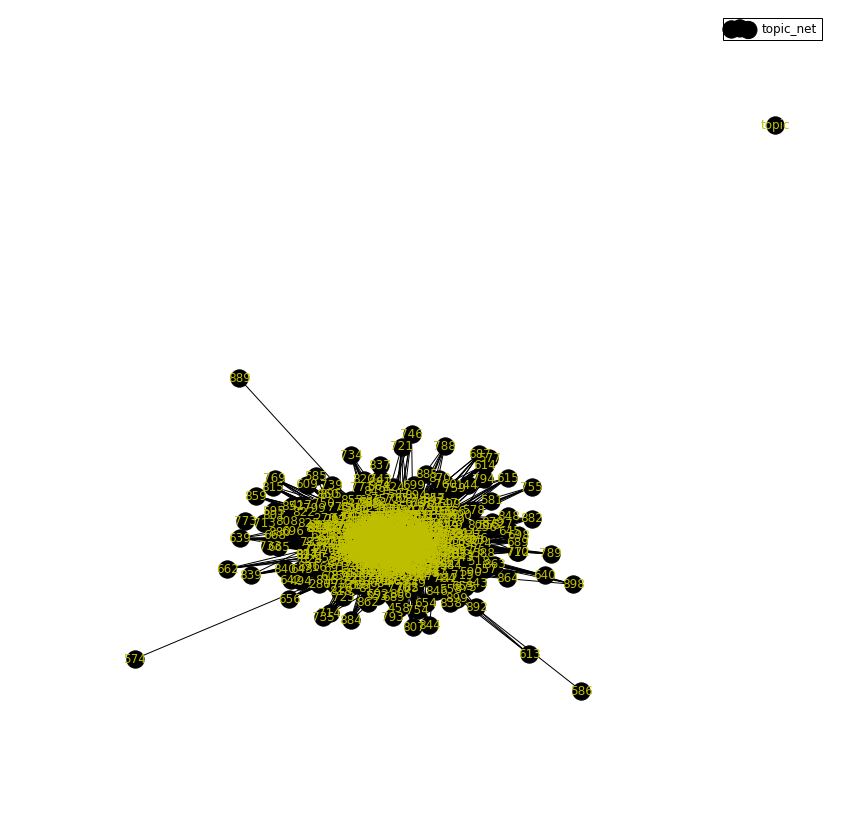

In [2]:
fb_csv = csv.reader(open('p2_data.csv'))
users = []
topics = []
fb_g = net.Graph()

for row in fb_csv:
    if row[0] not in users:
        users.append(row[0])
    if row[1] not in topics:
        topics.append(row[1])
    fb_g.add_edge(row[0], row[1], weight = row[2])

plt.figure(figsize=(11,11))
topic_net = bi.weighted_projected_graph(fb_g, topics, ratio=False)
weights=[math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]

#L_lib= L.subgraph(Liberal)
#d = nx.degree(L_lib)
net.draw_spring(topic_net, label = 'topic_net', node_color='k',with_labels=True,node_size =300,font_color ='y')
plt.legend(["topic_net"])
plt.show()

#net.draw_networkx(topic_net,width=weights,edge_color=weights)

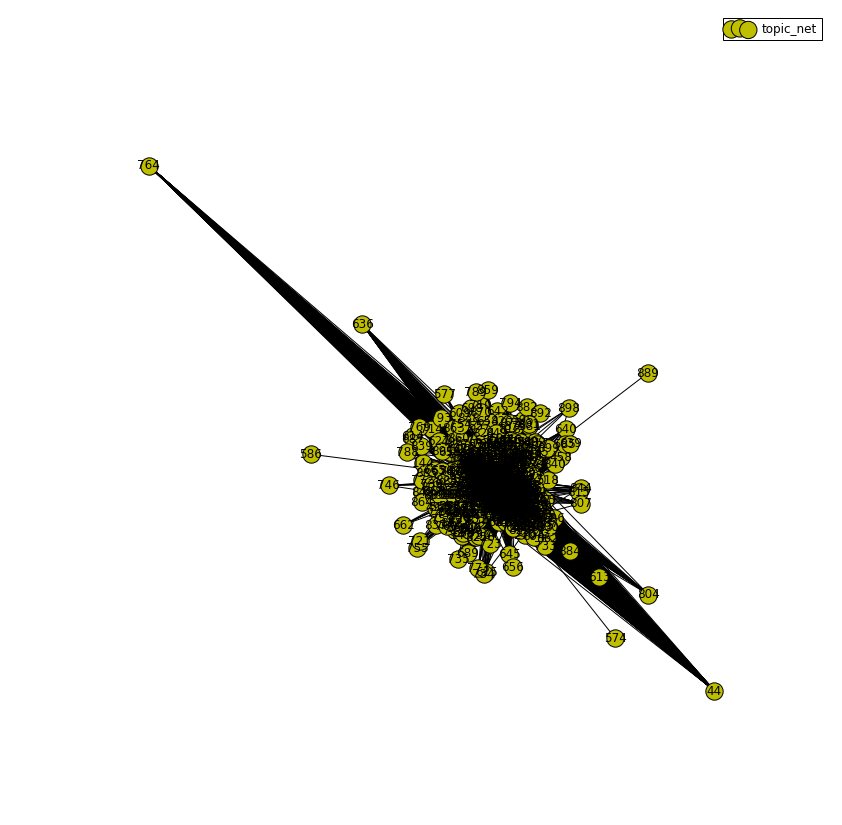

In [3]:

plt.figure(figsize=(11,11))
topic_net = bi.weighted_projected_graph(fb_g, topics, ratio=False)
topic_net=max(net.connected_component_subgraphs(topic_net),key=len)
weights=[math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]
net.draw_spring(topic_net, label = 'topic_net', node_color='y',with_labels=True,node_size =300,font_color ='k')
plt.legend(["topic_net"])
plt.show()
#net.draw_networkx(topic_net,width=weights,edge_color=weights)



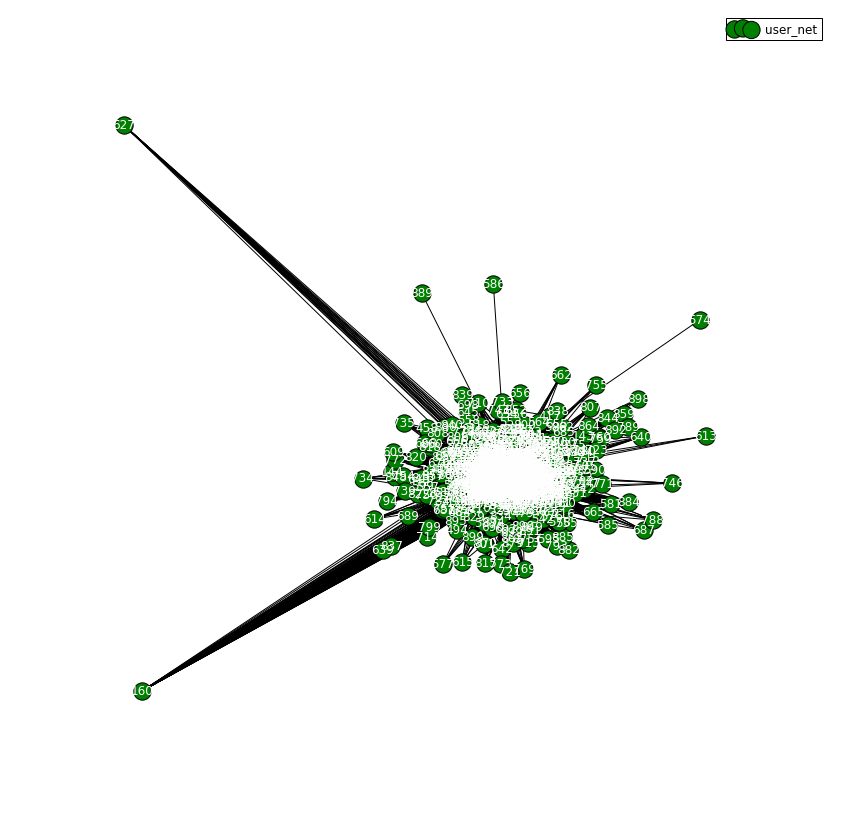

In [4]:
plt.figure(figsize=(11,11))
user_net = bi.weighted_projected_graph(fb_g, users, ratio=False)
user_net=max(net.connected_component_subgraphs(user_net),key=len)
weights=[math.log(edata['weight'])for f,t,edata in user_net.edges(data=True)]
net.draw_spring(topic_net, label = 'user_net', node_color='g',with_labels=True,node_size =300,font_color ='w')
plt.legend(["user_net"])
plt.show()

### 2. Reducing the Network

In [5]:
def trim_edges(fb_g,weight=1):
    fb_g2=net.Graph()
    for f, to, edata in fb_g.edges(data=True):
        if edata['weight']>weight:
            fb_g2.add_edge(f, to,edata)
    return fb_g2

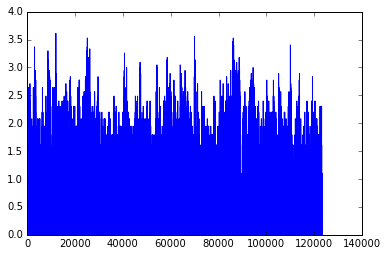

In [6]:
plt.plot(weights)

In [7]:
usernet_trim=trim_edges(user_net,weight=math.exp(0.9))

In [8]:
weights=[edata['weight'] for f,t,edata in usernet_trim.edges(data=True)]


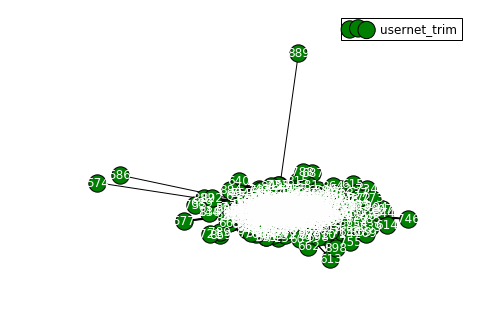

In [9]:
net.draw_spring(topic_net, label = 'usernet_trim', node_color='g',with_labels=True,node_size =300,font_color ='w')
plt.legend(["usernet_trim"])
plt.show()

### 3. Inferences About Groups

In [10]:
# Function defined sorted_map for sorting books based on their centrality value
def sorted_map(map):
    ms= sorted(map.iteritems(),key=lambda(k,v):(-v,k))
    return ms

In [11]:
#Compute Degree Of Centrality
d = net.degree(usernet_trim)
ds = sorted_map(d)
ds[0:10]

[('100', 458),
 ('13', 430),
 ('67', 425),
 ('18', 407),
 ('164', 403),
 ('82', 392),
 ('12', 379),
 ('10', 344),
 ('47', 340),
 ('377', 337)]

In [12]:
user_ud = usernet_trim.to_undirected()
fb_components = net.connected_component_subgraphs(user_ud)
net.is_directed(user_ud)


False

In [13]:
#Find Communities 

import community

part = community.best_partition(user_ud)
mod = community.modularity(part,user_ud)

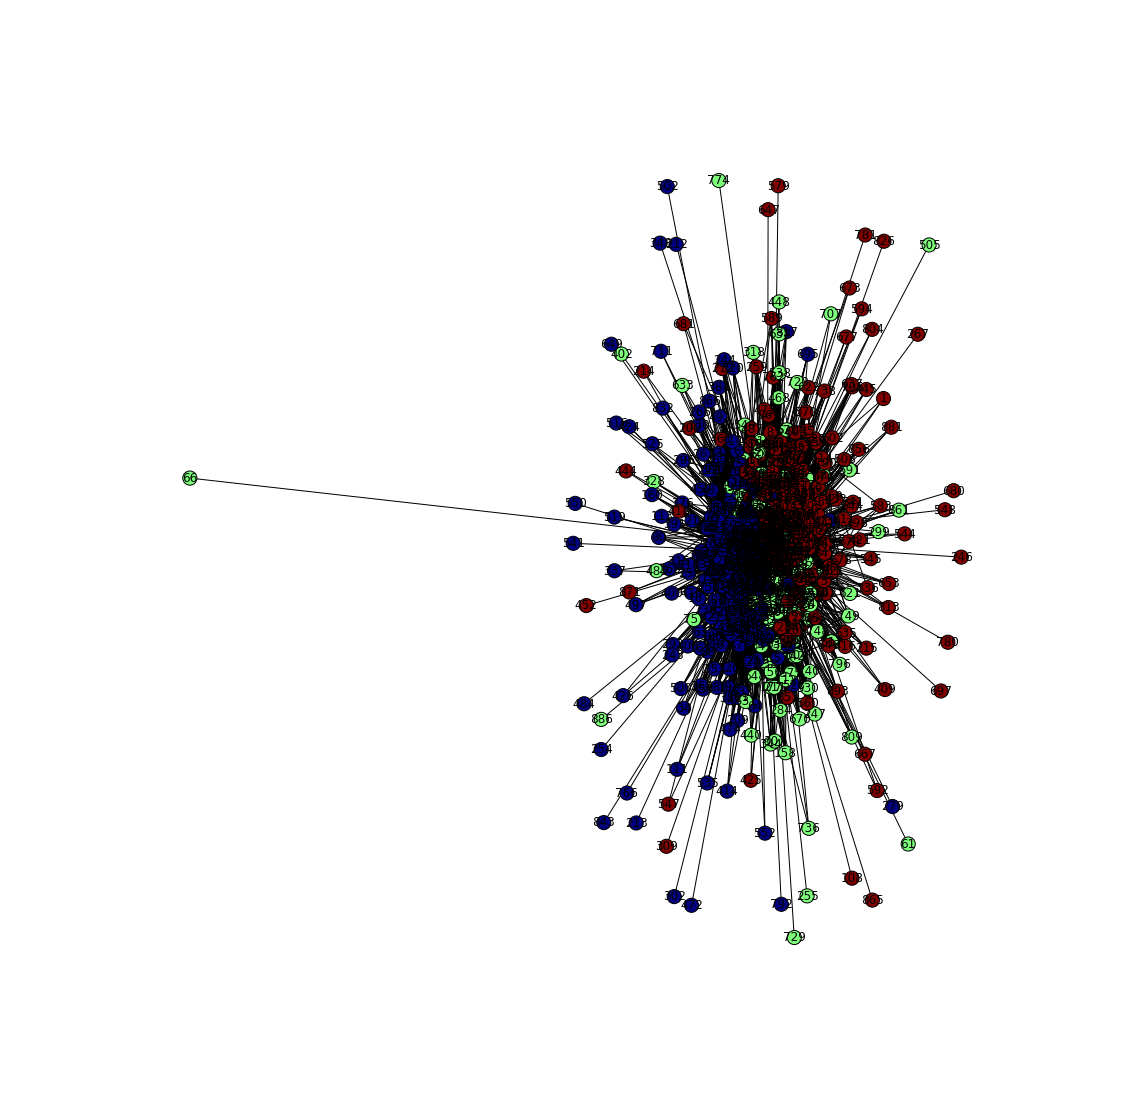

In [14]:
values = [part.get(node) for node in user_ud.nodes()]
plt.figure(figsize=(15,15))
pos=net.drawing.spring_layout(user_ud)
net.draw(user_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

In [15]:
# Examine node data
print user_ud.nodes(data=True)[0:5]

[('198', {}), ('344', {}), ('819', {}), ('346', {}), ('347', {})]


In [16]:
user_ud=fb_g

dcent=net.degree_centrality(user_ud)
dcent_s=sorted_map(dcent)
dcent_s[0:10]

[('10', 0.14222222222222222),
 ('13', 0.13555555555555557),
 ('67', 0.12555555555555556),
 ('164', 0.11333333333333333),
 ('82', 0.11333333333333333),
 ('100', 0.1111111111111111),
 ('75', 0.10666666666666666),
 ('12', 0.10555555555555556),
 ('18', 0.10222222222222223),
 ('59', 0.09666666666666666)]

In [18]:
ccent=net.closeness_centrality(user_ud)
ccent_s=sorted_map(ccent)
ccent_s[0:10]

[('67', 0.4827610153256705),
 ('13', 0.4825010470890923),
 ('100', 0.48146396799808944),
 ('82', 0.4733251159241651),
 ('10', 0.4725761837787154),
 ('18', 0.4686215713621571),
 ('12', 0.4673992928766012),
 ('164', 0.46594094874906106),
 ('290', 0.4620961549481405),
 ('75', 0.4592539438464605)]

In [19]:
bcent = net.betweenness_centrality(user_ud)
bcent_s = sorted_map(bcent)
bcent_s[0:10]

[('10', 0.04891735658757288),
 ('13', 0.043830719047310875),
 ('67', 0.04038994363775583),
 ('59', 0.03758577006451385),
 ('82', 0.0342567240543641),
 ('75', 0.031513261643626375),
 ('12', 0.03030096057066459),
 ('164', 0.02954533063960384),
 ('100', 0.027476003328367846),
 ('18', 0.025769504235119048)]

In [81]:
from prettytable import PrettyTable


names1=[x[0] for x in dcent_s[:19]]
names2=[x[0] for x in ccent_s[:19]]
names3=[x[0] for x in bcent_s[:19]]
names=list(set(names1)|set(names2)|set(names3))

table=[[name,user_ud.degree(name),round(dcent[name],3),round(ccent[name],3),round(bcent[name],3)] for name in names]


table=sorted(table,key=lambda x: -x[4])
pt = PrettyTable(['Node','Degree','Degree Cent.','Closeness Cent.','Betweenness Cent.'])
for i in range(0, len(table)):
    pt.add_row(table[i])
    
print pt


+------+--------+--------------+-----------------+-------------------+
| Node | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. |
+------+--------+--------------+-----------------+-------------------+
|  10  |  128   |    0.142     |      0.473      |       0.049       |
|  13  |  122   |    0.136     |      0.483      |       0.044       |
|  67  |  113   |    0.126     |      0.483      |        0.04       |
|  59  |   87   |    0.097     |      0.455      |       0.038       |
|  82  |  102   |    0.113     |      0.473      |       0.034       |
|  75  |   96   |    0.107     |      0.459      |       0.032       |
| 164  |  102   |    0.113     |      0.466      |        0.03       |
|  12  |   95   |    0.106     |      0.467      |        0.03       |
| 100  |  100   |    0.111     |      0.481      |       0.027       |
|  18  |   92   |    0.102     |      0.469      |       0.026       |
| 208  |   79   |    0.088     |      0.443      |       0.023       |
|  91 

In [74]:
from prettytable import PrettyTable


names1=[x[0] for x in dcent_s[:19]]
names2=[x[0] for x in ccent_s[:19]]
names3=[x[0] for x in bcent_s[:19]]
#names=list(set(names1))



TopNodes=names1+names2+names3



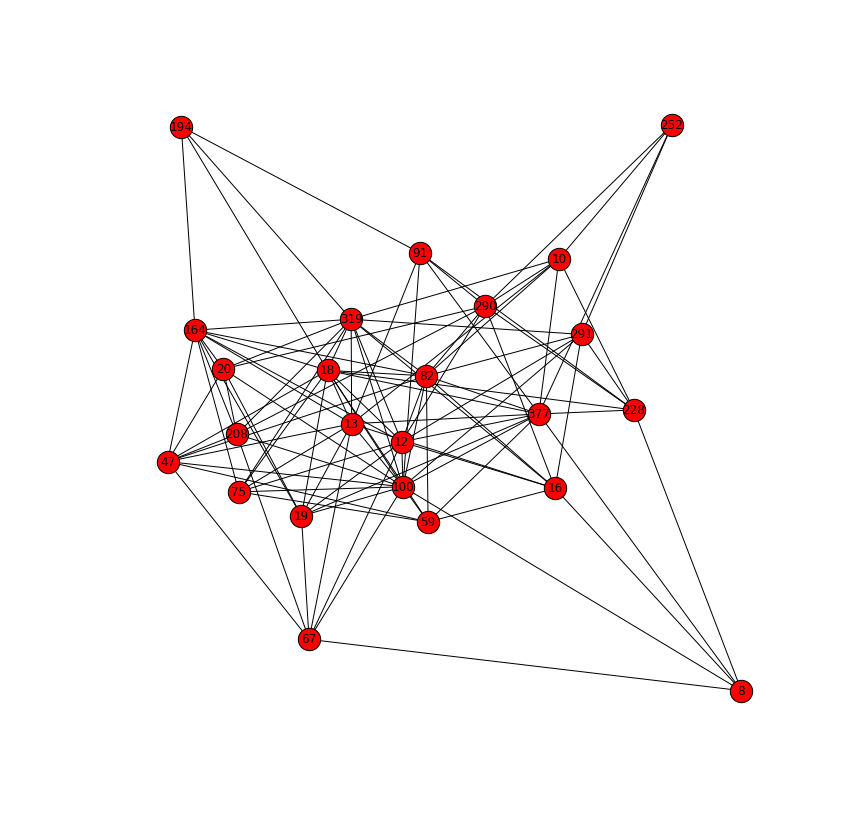

In [82]:
#  Subgraph of Most Central Individuals
plt.figure(figsize=(11,11))
G = net.Graph(user_ud)

nodes = G.nodes()
edges = G.edges()

H = net.path_graph(903)
H.add_nodes_from(G)
H.add_edges_from(G.edges())

H2 = H.subgraph(TopNodes)
centralcenter = net.center(H2)
       
net.draw(H2, with_labels=True, node_color = "r", node_size = 500)